In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
# Read in csv files
realtor = pd.read_csv("../data/realtor_housing_metrics_state.csv")

national_realtor = pd.read_csv("../data/realtor_housing_metrics_country.csv")

median_income = pd.read_csv("../data/median_income_by_state.csv")

national_median_income = pd.read_csv("../data/income_updated.csv", index_col = [0])

In [82]:
# Converting to datetime column & creating year column
realtor['month_date_yyyymm'] = pd.to_datetime(realtor['month_date_yyyymm'])

realtor['year'] = realtor['month_date_yyyymm'].dt.year

realtor['month'] = realtor['month_date_yyyymm'].dt.month_name()

national_realtor['month_date_yyyymm'] = pd.to_datetime(national_realtor['month_date_yyyymm'])

national_realtor['year'] = national_realtor['month_date_yyyymm'].dt.year

national_realtor['month'] = national_realtor['month_date_yyyymm'].dt.month_name()

In [83]:
# Creating df for housing by state & housing for the whole country
housing_df = realtor.merge(median_income)

national_housing_df = national_realtor.merge(national_median_income)

# Create affordability index line graph at national level

In [81]:
national_housing_df

,month_date_yyyymm,country,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,pending_listing_count,median_listing_price_per_square_foot,median_square_feet,average_listing_price,total_listing_count,pending_ratio,quality_flag,year,month,median_income
0,2022-12-01,United States,405000.0,680925.0,65.0,215936.0,12220.0,171016.0,320063.0,213.0,1852.0,697223.0,997725.0,0.4700,0.0,2022,December,74580
1,2022-11-01,United States,416000.0,750200.0,55.0,295002.0,12948.0,284788.0,368037.0,215.0,1866.0,698710.0,1114734.0,0.4906,0.0,2022,November,74580
2,2022-10-01,United States,425000.0,752741.0,50.0,360280.0,13828.0,328816.0,413681.0,219.0,1874.0,702042.0,1160500.0,0.5496,0.0,2022,October,74580
3,2022-09-01,United States,427750.0,731496.0,47.0,393884.0,15828.0,319200.0,465972.0,221.0,1873.0,701927.0,1192809.0,0.6370,0.0,2022,September,74580
4,2022-08-01,United States,432590.0,726779.0,41.0,418468.0,18206.0,314304.0,488449.0,223.0,1877.0,709874.0,1211674.0,0.6721,0.0,2022,August,74580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,2016-11-01,United States,252995.0,1339703.0,74.0,376704.0,33728.0,319372.0,331791.0,126.0,1903.0,444847.0,1667766.0,0.2477,NaN,2016,November,59040
86,2016-10-01,United States,255000.0,1407698.0,72.0,413376.0,36128.0,365872.0,353149.0,127.0,1913.0,443573.0,1757600.0,0.2509,NaN,2016,October,59040
87,2016-09-01,United States,255000.0,1443081.0,71.0,452994.0,37224.0,406610.0,369527.0,127.0,1920.0,439192.0,1807800.0,0.2561,NaN,2016,September,59040
88,2016-08-01,United States,255271.0,1460048.0,67.0,470780.0,40484.0,408718.0,392800.0,126.0,1921.0,439230.0,1848445.0,0.2690,NaN,2016,August,59040


In [76]:
# Take median income and divide by median listing price
national_housing_df['affordability_index'] = national_housing_df['median_income'] / national_housing_df['median_listing_price']

<Axes: xlabel='month_date_yyyymm', ylabel='affordability_index'>

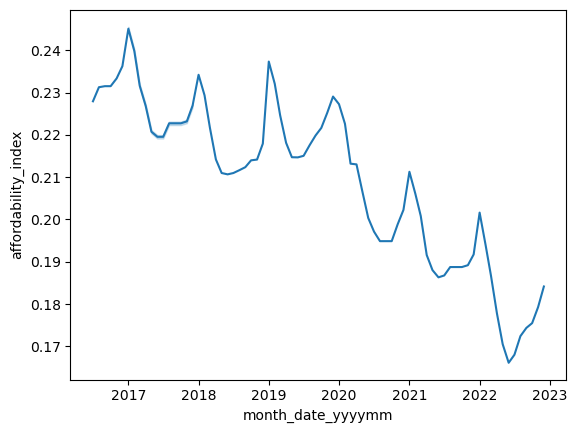

In [77]:
sns.lineplot(national_housing_df, x = 'month_date_yyyymm', y = 'affordability_index')

# Create affordability index line graph by state

In [90]:
# Take median income and divide by median listing price
housing_df['affordability_index'] = housing_df['Households'] / housing_df['median_listing_price']

In [38]:
housing_df.query("state == 'Hawaii'")

,month_date_yyyymm,state,state_id,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,pending_listing_count,...,total_listing_count,pending_ratio,quality_flag,year,Households,15 to 24 years,25 to 44 years,45 to 64 years,65 years and over,affordability_index
456,2022-12-01,Hawaii,HI,845000.0,3508.0,68.0,1116.0,28.0,684.0,1461.0,...,4997.0,0.4165,0.0,2022,94814,55565,96571,110596,81656,0.112206
457,2022-11-01,Hawaii,HI,847000.0,3472.0,61.0,1346.0,28.0,858.0,1587.0,...,5059.0,0.4571,0.0,2022,94814,55565,96571,110596,81656,0.111941
458,2022-10-01,Hawaii,HI,850000.0,3297.0,60.0,1344.0,32.0,892.0,1785.0,...,5054.0,0.5414,0.0,2022,94814,55565,96571,110596,81656,0.111546
459,2022-09-01,Hawaii,HI,870000.0,3108.0,59.0,1458.0,42.0,910.0,2011.0,...,5091.0,0.6470,0.0,2022,94814,55565,96571,110596,81656,0.108982
460,2022-08-01,Hawaii,HI,886500.0,3142.0,53.0,1436.0,30.0,902.0,2053.0,...,5198.0,0.6534,0.0,2022,94814,55565,96571,110596,81656,0.106953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3775,2016-11-01,Hawaii,HI,652500.0,5882.0,89.0,1704.0,64.0,744.0,1699.0,...,7583.0,0.2888,NaN,2016,71977,39474,72915,82810,61116,0.110310
3776,2016-10-01,Hawaii,HI,649900.0,5904.0,89.0,1788.0,68.0,872.0,1681.0,...,7602.0,0.2847,NaN,2016,71977,39474,72915,82810,61116,0.110751
3777,2016-09-01,Hawaii,HI,649975.0,6024.0,88.0,1558.0,50.0,936.0,1729.0,...,7766.0,0.2870,NaN,2016,71977,39474,72915,82810,61116,0.110738
3778,2016-08-01,Hawaii,HI,650000.0,6257.0,87.0,1734.0,70.0,978.0,1735.0,...,8006.0,0.2772,NaN,2016,71977,39474,72915,82810,61116,0.110734


<Axes: xlabel='month_date_yyyymm', ylabel='affordability_index'>

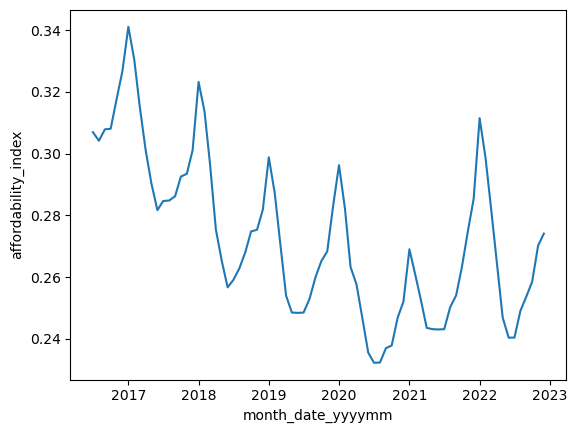

In [44]:
# Shows the affordability index over the years for the selected state
state = 'Michigan'

housing_for_state = housing_df.query(f"state == '{state}'")

sns.lineplot(housing_for_state, x = 'month_date_yyyymm', y = 'affordability_index')

# Create top/bottom 5 states by affordability index bar chart

In [86]:
housing_df

,month_date_yyyymm,state,state_id,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,pending_listing_count,...,total_listing_count,pending_ratio,quality_flag,year,month,Households,15 to 24 years,25 to 44 years,45 to 64 years,65 years and over
0,2022-12-01,Rhode Island,RI,475000.0,1182.0,45.0,544.0,12.0,228.0,1268.0,...,2442.0,1.0728,0.0,2022,December,81370,43688,86770,100530,56242
1,2022-11-01,Rhode Island,RI,475000.0,1384.0,38.0,856.0,12.0,458.0,1462.0,...,2834.0,1.0564,0.0,2022,November,81370,43688,86770,100530,56242
2,2022-10-01,Rhode Island,RI,475000.0,1376.0,37.0,944.0,8.0,460.0,1620.0,...,2990.0,1.1773,0.0,2022,October,81370,43688,86770,100530,56242
3,2022-09-01,Rhode Island,RI,484475.0,1353.0,40.0,1006.0,4.0,414.0,1826.0,...,3170.0,1.3496,0.0,2022,September,81370,43688,86770,100530,56242
4,2022-08-01,Rhode Island,RI,482675.0,1460.0,34.0,1084.0,14.0,444.0,1932.0,...,3376.0,1.3233,0.0,2022,August,81370,43688,86770,100530,56242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3973,2016-11-01,Iowa,IA,164900.0,13242.0,73.0,3344.0,308.0,3052.0,3033.0,...,16260.0,0.2290,NaN,2016,November,54570,27458,62191,67143,38140
3974,2016-10-01,Iowa,IA,163950.0,13746.0,68.0,3896.0,320.0,3620.0,3327.0,...,17092.0,0.2420,NaN,2016,October,54570,27458,62191,67143,38140
3975,2016-09-01,Iowa,IA,162950.0,13855.0,67.0,4138.0,286.0,3712.0,3642.0,...,17477.0,0.2629,NaN,2016,September,54570,27458,62191,67143,38140
3976,2016-08-01,Iowa,IA,162950.0,13895.0,65.0,4458.0,338.0,3732.0,3866.0,...,17718.0,0.2782,NaN,2016,August,54570,27458,62191,67143,38140


In [92]:
metric = 'median_listing_price'
month = 'December'
year = 2022

housing_df.query(f"year == {year} and month == '{month}'")\
.sort_values(f"{metric}", ascending = True)


,month_date_yyyymm,state,state_id,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,pending_listing_count,...,pending_ratio,quality_flag,year,month,Households,15 to 24 years,25 to 44 years,45 to 64 years,65 years and over,affordability_index
108,2022-12-01,West Virginia,WV,219000.0,3124.0,72.0,932.0,36.0,600.0,1645.0,...,0.5266,0.0,2022,December,55217,30438,65724,65200,43429,0.252132
144,2022-12-01,Ohio,OH,219900.0,14562.0,53.0,7028.0,132.0,4420.0,10798.0,...,0.7415,0.0,2022,December,66990,38524,75413,81602,49800,0.304638
432,2022-12-01,Michigan,MI,249900.0,18203.0,59.0,6612.0,244.0,4684.0,6356.0,...,0.3492,0.0,2022,December,68505,38933,76819,83523,51863,0.274130
216,2022-12-01,Indiana,IN,267000.0,10907.0,57.0,4792.0,80.0,3296.0,4013.0,...,0.3679,0.0,2022,December,67173,36444,74628,82494,49429,0.251584
96,2022-12-01,Mississippi,MS,274000.0,5547.0,74.0,1652.0,68.0,1236.0,2512.0,...,0.4529,0.0,2022,December,52985,31259,58241,62043,41473,0.193376
540,2022-12-01,Pennsylvania,PA,274000.0,19793.0,67.0,6672.0,568.0,4636.0,11615.0,...,0.5868,0.0,2022,December,73170,40108,84653,89726,51201,0.267044
48,2022-12-01,Illinois,IL,274700.0,20829.0,57.0,6380.0,136.0,4252.0,11911.0,...,0.5718,0.0,2022,December,78433,38244,87450,95019,55569,0.285522
516,2022-12-01,Missouri,MO,275000.0,12586.0,64.0,4104.0,220.0,2848.0,6904.0,...,0.5485,0.0,2022,December,65920,36299,75199,79430,48780,0.239709
588,2022-12-01,Kansas,KS,277250.0,4820.0,66.0,1740.0,96.0,1012.0,3125.0,...,0.6483,0.0,2022,December,69747,38324,78703,85651,53309,0.251567
528,2022-12-01,Louisiana,LA,279000.0,10753.0,75.0,2632.0,100.0,1988.0,4077.0,...,0.3792,0.0,2022,December,57852,32411,67420,67911,43997,0.207355


In [93]:
housing_df.columns

Index(['month_date_yyyymm', 'state', 'state_id', 'median_listing_price',
       'active_listing_count', 'median_days_on_market', 'new_listing_count',
       'price_increased_count', 'price_reduced_count', 'pending_listing_count',
       'median_listing_price_per_square_foot', 'median_square_feet',
       'average_listing_price', 'total_listing_count', 'pending_ratio',
       'quality_flag', 'year', 'month', 'Households', '15 to 24 years',
       '25 to 44 years', '45 to 64 years', '65 years and over',
       'affordability_index'],
      dtype='object')

In [95]:
year = 2022

national_housing_df.query(f"year == {year}")

,month_date_yyyymm,country,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,pending_listing_count,median_listing_price_per_square_foot,median_square_feet,average_listing_price,total_listing_count,pending_ratio,quality_flag,year,month,median_income
0,2022-12-01,United States,405000.0,680925.0,65.0,215936.0,12220.0,171016.0,320063.0,213.0,1852.0,697223.0,997725.0,0.4700,0.0,2022,December,74580
1,2022-11-01,United States,416000.0,750200.0,55.0,295002.0,12948.0,284788.0,368037.0,215.0,1866.0,698710.0,1114734.0,0.4906,0.0,2022,November,74580
2,2022-10-01,United States,425000.0,752741.0,50.0,360280.0,13828.0,328816.0,413681.0,219.0,1874.0,702042.0,1160500.0,0.5496,0.0,2022,October,74580
3,2022-09-01,United States,427750.0,731496.0,47.0,393884.0,15828.0,319200.0,465972.0,221.0,1873.0,701927.0,1192809.0,0.6370,0.0,2022,September,74580
4,2022-08-01,United States,432590.0,726779.0,41.0,418468.0,18206.0,314304.0,488449.0,223.0,1877.0,709874.0,1211674.0,0.6721,0.0,2022,August,74580
5,2022-07-01,United States,443900.0,691652.0,34.0,471952.0,19136.0,323960.0,503396.0,226.0,1880.0,726631.0,1191265.0,0.7278,0.0,2022,July,74580
6,2022-06-01,United States,449000.0,573650.0,31.0,533424.0,23424.0,245488.0,544429.0,227.0,1876.0,752455.0,1115389.0,0.9491,0.0,2022,June,74580
7,2022-05-01,United States,437450.0,479462.0,30.0,526354.0,27388.0,161880.0,562258.0,226.0,1852.0,767545.0,1040968.0,1.1727,0.0,2022,May,74580
8,2022-04-01,United States,419500.0,379978.0,30.0,495660.0,30500.0,92732.0,556653.0,219.0,1812.0,764575.0,932721.0,1.4650,0.0,2022,April,74580
9,2022-03-01,United States,399450.0,354016.0,34.0,435128.0,36886.0,75382.0,522688.0,213.0,1795.0,758528.0,873465.0,1.4765,0.0,2022,March,74580
